# Recommendation System for Amazon Clothing Products
---
## 1. Products Data Loading and Preprocessing 

*Author*: Mariam Elsayed

*Contact*: mariamkelsayed@gmail.com

*Notebook*: 1 of 6

*Next Notebook*: `reviews_loading_preprocessing.ipynb`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Table of Contents

* [Introduction](#intro)

    * [Data Dictionary](#datadic)

* [Loading the Raw Data](#loading)
   
* [Dealing with Nulls](#nulls)
    
* [Cleaning Data](#cleaning)

    * [`description` column](#description)

    * [`price` column](#price)

    * [`date` column](#date)

    * [`brand` column](#brand)

    * [Binarizing Columns with Lists](#binarizing)

        * [`category` column](#category)

        * [`feature` column](#feature)

* [Saving the Products Dataframe](#saving)

* [Visualizations](#visualizations)

* [Conclusion](#conc)


## Introduction <a class="anchor" id="intro"></a>

This is the first notebook of the my project on recommendation systems for Amazon clothing products. The focus of this notebook will be to load the products metadata from the original source's JSON file and to filter, clean, and appropriately format the data for later use when modelling. Some visualizations describing the data will be provided at the end. 

Since the data is very large, most rows or columns that weren't perfectly fitting into the idea of how the data generally looked like were dropped instead of worked with/modified.


### Data Dictionary <a class="anchor" id="datadic"></a>

Our final products dataset after this notebook will look like:

| Column Name   | Data Type | Description                                                               |
|---------------|-----------|---------------------------------------------------------------------------|
| `category`    | object    | list of categories of the product                                         |
| `description` | object    | description of the product                                                |
| `title`       | object    | title of the product                                                      |
| `brand`       | object    | brand of the product                                                      |
| `rank`        | integer   | rank of the product in the Clothing, Shoes & Jewelry category             |
| `asin`        | object    | unique identifier of the product                                          |
| `price`       | float     | price of the item                                                         |
| `maincat_`    | boolean   | boolean columns that indicate whether a product is in the a main category |
| `subcat_`     | boolean   | boolean columns that indicate whether a product is in the a subcategory   |

This is dataframe is saved in `Data/products_cleaned.csv`.

---
## Loading the Raw Data <a id='loading'></a>

The data is loaded from `meta_Clothing_Shoes_and_Jewelry.json`. It is very large (~2.6 million rows), so it had to be loaded in chunks. Running the following code block to load the data takes around 40 minutes, so a csv file was made containing the output of the following code block as a checkpoint for the original data.

In [ ]:
products_df = []

with open('data/meta_Clothing_Shoes_and_Jewelry.json', 'r') as f:
    
    reader = pd.read_json(f, orient = 'records', lines = True, chunksize = 50_000, nrows = 2685059)
    
    total = 2685059/50_000
    counter = 0
    
    for chunk in reader:
                
        products_df.append(chunk)
        
        counter += 1
        print(counter/total*100, end="\r")
        
products_df = pd.concat(products_df, ignore_index = True)

In [2]:
# Saving the loaded data as a checkpoint
products_df.to_csv('Data/raw_products.csv', index = False)

In [40]:
# Uncomment to skip loading the data file
products_df = pd.read_csv('Data/raw_products.csv')

In [41]:
products_df

,category,description,title,brand,feature,rank,date,asin,also_view,price,also_buy,main_cat,details,similar_item
0,"['Clothing, Shoes & Jewelry', 'Costumes & Acce...","['6"" long, stretched waist measures 11 1/2"" ac...",Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Big Dreams,"['3 layers of tulle', '6"" long, stretched wais...","19,963,069inClothing,ShoesJewelry(",5 star5 star (0%),0000037214,NaN,NaN,NaN,NaN,NaN,NaN
1,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...,Anello,"['Polyester Canvas Waterproof', 'Imported', 'S...","4,537,420inClothing,ShoesJewelry(",5 star,0201377179,NaN,NaN,NaN,NaN,NaN,NaN
2,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,"['PU Leather', 'Imported', 'Size: Large PU Lea...","3,994,472inClothing,ShoesJewelry(",5 star,0204444454,"['B07CJF5HLR', 'B01EBI8UH6', 'B01N1LR908', 'B0...",$70.00,NaN,NaN,NaN,NaN
3,"['Clothing, Shoes & Jewelry', 'Luggage & Trave...",['The Hottest Bag in Town! Brand: Anello Condi...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,"['PU Leather', 'Imported', 'Size: Large PU Lea...","635,761inClothing,ShoesJewelry(",5 star,0204444403,"['B01DLVYOPG', 'B07CJF5HLR', 'B01MSS59Y6', 'B0...",$65.99,NaN,NaN,NaN,NaN
4,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",['Brand New. Hat Centre Length: adult about 8...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,"['Imported', 'Plush,Cotton, Polyester', 'Lovel...","5,061,041inClothing,ShoesJewelry(",5 star5 star (0%),0206313535,"['B00VGT93YS', 'B07FTY87LM', 'B01IKVOY8E', 'B0...",$18.99,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685054,"['Clothing, Shoes & Jewelry', 'Baby', 'Baby Gi...",['Size Length Hip*2 Age Advice 70 39.5 CM 30 C...,Newborn Baby Girl Bodysuit Lace Floral Romper ...,Hotone,"['New in Fashion', 'Material: Cotton Blend', '...","1,671,980inClothing,ShoesJewelry(",5 star,B01HJHR8A6,NaN,$4.99,"['B01K9VS6F0', 'B07CRH23Q7', 'B01IP4R5K0', 'B0...",NaN,NaN,NaN
2685055,"['Clothing, Shoes & Jewelry', 'Women', 'Shoes'...",['Soludos are made in US whole sizes. If you a...,Soludos Women's Tall Espadrille Wedge Sandal,Soludos,"['Linen', 'Made in USA or Imported', 'Syntheti...","3,988,993inClothing,ShoesJewelry(",5 star5 star (0%),B01HJHA4W0,NaN,NaN,['B07BTK4QRC'],NaN,NaN,NaN
2685056,"['Clothing, Shoes & Jewelry', 'Novelty & More'...",[''],ChicAmigas88 Sweetheart Mermaid Long Beach Wed...,Unknown,"['Material: Organza', 'Sweetheart Long Mermaid...","13,124,926inClothing,ShoesJewelry(",5 star,B01HJHQR1W,NaN,NaN,NaN,NaN,NaN,NaN
2685057,"['Clothing, Shoes & Jewelry', 'Men', 'Shoes', ...",['This classic plain toe style is anything but...,Deer Stags Men's Lohi Oxford,NaN,"['100% Leather', 'Imported', 'Synthetic sole',...","1,228,949inClothing,ShoesJewelry(",5 star,B01HJH8JBI,"['B01ICBF8T6', 'B07CL3C92Q', 'B071W7GNWS', 'B0...",$28.23 - $80.00,NaN,NaN,NaN,NaN


In [4]:
# Copying the original dataframe to use to check
original_products_df = products_df.copy()

### Dropping Columns<a name='dropping'></a>
Image data won't be considered in this project so `imageURL` and `imageURLHighRes` will be dropped. `Fit`, `tech1`, and `tech2` will be dropped as well because they are mostly empty and don't provide information that would be used.

In [5]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category         0.000000
description     25.005298
title            0.002197
brand           29.894762
feature          6.069066
rank             2.600092
date             6.907483
asin             0.000000
also_view       72.385188
price           66.447776
also_buy        82.884398
main_cat        92.058722
details         95.717673
similar_item    99.362137
dtype: float64

In [4]:
# Dropping image and empty columns
products_df = products_df.drop(columns = ['imageURL', 'imageURLHighRes', 'fit', 'tech1', 'tech2'])

KeyError: "['imageURL', 'imageURLHighRes', 'fit', 'tech1', 'tech2'] not found in axis"

In [ ]:
# Sanity check
products_df.columns

Index(['category', 'description', 'title', 'brand', 'feature', 'rank', 'date',
       'asin', 'also_view', 'price', 'also_buy', 'main_cat', 'details',
       'similar_item'],
      dtype='object')

---
## Dealing with Nulls <a class="anchor" id="nulls"></a>

In [42]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category         0.000000
description     25.005298
title            0.002197
brand           29.894762
feature          6.069066
rank             2.600092
date             6.907483
asin             0.000000
also_view       72.385188
price           66.447776
also_buy        82.884398
main_cat        92.058722
details         95.717673
similar_item    99.362137
dtype: float64

Since we have a large dataframe, we are going to be dropping rows with relevant null values. The only column we need to be not null is `asin`, the unique identifier. Having the price would be nice, so lets drop the rows containing no prices. We are going to remove the `also_view`, `also_buy`, `main_cat`, and `similar_item` columns, these are mostly null and things we are trying to predict anyway.

### Dropping the Mostly Null Columns <a id='dropcolumns'></a>
As discussed before, the `also_view`, `also_buy`, `main_cat`, and `similar_item` columns will be removed from the dataframe.

In [43]:
# Dropping mostly null columns
products_df.drop(columns=['also_view', 'also_buy', 'main_cat', 'similar_item'], inplace=True)

In [44]:
# Sanity check
products_df.columns

Index(['category', 'description', 'title', 'brand', 'feature', 'rank', 'date',
       'asin', 'price', 'details'],
      dtype='object')

Lets take a look at `details`.

In [45]:
products_df.loc[2685031, 'details']

'\n      <div class="content">\n\n\n\n\n\n\n<ul>\n\n\n\n\n\n\n\n\n\n\n\n\n\n                                                                                \n\n\n    <li><b>\n    Item Weight: \n    </b>\n    9 ounces\n    </li>\n\n\n\n\n\n\n\n\n<li><b>Shipping Weight:</b> 9 ounces (<a href="/gp/help/seller/shipping.html/ref=dp_pd_shipping?ie=UTF8&amp;asin=B071ZL3PBK&amp;seller=">View shipping rates and policies</a>)</li>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<li><b>ASIN: </b>B071ZL3PBK</li>\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<li><b>Average Customer Review:</b> \n\n\n\n\n<span class="dpProductDetailB071ZL3PBK">\n  <span class="a-declarative" data-action="a-popover" data-a-popover="{&quot;closeButton&quot;:&quot;false&quot;,&quot;max-width&quot;:&quot;700&quot;,&quot;position&quot;:&quot;triggerBottom&quot;,&quot;url&quot;:&quot;/review/widgets/average-customer-review/popover/ref=acr_

Investigating the `details` column, it looks like some html stuff that wouldn't be used. Lets drop the column.

In [46]:
products_df.drop(columns=['details'], inplace=True)

In [47]:
# Sanity check
products_df.columns

Index(['category', 'description', 'title', 'brand', 'feature', 'rank', 'date',
       'asin', 'price'],
      dtype='object')

### Dropping Rows<a id='droprows'></a>

Since we are dealing with very large data, we are going to be dropping rows of data which contain null columns with important data. 

In [48]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category        0.000000
description    25.005298
title           0.002197
brand          29.894762
feature         6.069066
rank            2.600092
date            6.907483
asin            0.000000
price          66.447776
dtype: float64


Lets drop the rows where `description` and `title` is null. The title is how the product would be identified and the descriptions is what would be vectorized to make recommendations later.

In [49]:
# Dropping rows with no title
products_df.dropna(axis = 0, subset=['title'], inplace=True)

# Dropping rows with no description
products_df.dropna(axis = 0, subset=['description'], inplace=True)

In [50]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category        0.000000
description     0.000000
title           0.000000
brand          27.283702
feature         2.468779
rank            2.613096
date            7.452125
asin            0.000000
price          61.992713
dtype: float64

---
## Cleaning Data <a id='cleaning'></a>

Next we will go through cleaning the format of the data and as well as binarizing the categorical data. 

#### `description` column <a class="anchor" id="description"></a>

Let's remove the square brackets and quotations enclosing the descriptions in the description column.

In [51]:
# Defining a series containing the descriptions
descriptions = products_df['description']
descriptions

0          ['6" long, stretched waist measures 11 1/2" ac...
1          ['The Hottest Bag in Town! Brand: Anello Condi...
2          ['The Hottest Bag in Town! Brand: Anello Condi...
3          ['The Hottest Bag in Town! Brand: Anello Condi...
4          ['Brand New.  Hat Centre Length: adult about 8...
                                 ...                        
2685054    ['Size Length Hip*2 Age Advice 70 39.5 CM 30 C...
2685055    ['Soludos are made in US whole sizes. If you a...
2685056                                                 ['']
2685057    ['This classic plain toe style is anything but...
2685058    ['CUPSHE Intro To inspire confidence and beaut...
Name: description, Length: 2013627, dtype: object

In [52]:
# Getting rid of the square brackets and quotation marks at the beginning and end of the description
descriptions = descriptions.str.replace('\[\'', '', regex=True)
descriptions = descriptions.str.replace('\'\]', '', regex=True)

descriptions = descriptions.str.replace('\[\"', '', regex=True)
descriptions = descriptions.str.replace('\"\]', '', regex=True)

In [53]:
# Sanity checks
descriptions

0          6" long, stretched waist measures 11 1/2" acro...
1          The Hottest Bag in Town! Brand: Anello Conditi...
2          The Hottest Bag in Town! Brand: Anello Conditi...
3          The Hottest Bag in Town! Brand: Anello Conditi...
4          Brand New.  Hat Centre Length: adult about 8cm...
                                 ...                        
2685054    Size Length Hip*2 Age Advice 70 39.5 CM 30 CM ...
2685055    Soludos are made in US whole sizes. If you are...
2685056                                                     
2685057    This classic plain toe style is anything but p...
2685058    CUPSHE Intro To inspire confidence and beauty ...
Name: description, Length: 2013627, dtype: object

In [54]:
# Sanity check
descriptions.iloc[0]

'6" long, stretched waist measures 11 1/2" across. Fits up to 7 years.'

In [55]:
# Putting the cleaned descriptions back into the description column of the dataframe
products_df['description'] = descriptions

#### `price` column <a class="anchor" id="price"></a>

Let's start with dropping the rows without any prices.

In [56]:
# Dropping null prices
products_df.dropna(axis = 0, subset=['price'], inplace=True)

In [57]:
# Checking the format of the prices
products_df.loc[2051736:2051750, 'price']

2051736     $12.18 - $23.19
2051737               $7.98
2051738    $31.00 - $124.95
2051739    $33.20 - $119.95
2051744    $35.99 - $120.00
2051747     $12.91 - $21.58
2051748    $34.72 - $135.00
2051750     $12.91 - $18.43
Name: price, dtype: object

The prices seem to either have one price with dollar sign in front, or be in a range with a dash seperating the range and a dollar sign in front of the number. Lets save the price column into its own series to analyze.

In [58]:
# Defining a series containing the prices
prices = products_df['price']
prices

2                   $70.00
3                   $65.99
4                   $18.99
5                   $23.99
8                   $65.33
                ...       
2685051             $12.21
2685052    $24.77 - $80.00
2685053             $18.99
2685054              $4.99
2685057    $28.23 - $80.00
Name: price, Length: 765325, dtype: object

In [59]:
# Removing the dollar sign from the whole series
prices = prices.str.replace(pat='\$', repl='')
prices

C:\Users\maria\AppData\Local\Temp\ipykernel_5364\85815742.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  prices = prices.str.replace(pat='\$', repl='')


2                  70.00
3                  65.99
4                  18.99
5                  23.99
8                  65.33
               ...      
2685051            12.21
2685052    24.77 - 80.00
2685053            18.99
2685054             4.99
2685057    28.23 - 80.00
Name: price, Length: 765325, dtype: object

There is a comma used in the prices as a thousands separator (ex. 1,000), so the following expression would remove all commas in the prices.

In [60]:
# Removing commas in the prices
prices = prices.str.replace(pat='\,', repl='')

C:\Users\maria\AppData\Local\Temp\ipykernel_5364\165674459.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  prices = prices.str.replace(pat='\,', repl='')


To deal with the ranges of prices, the average of the price range will be used. To do so, we will split the ranges into two columns in a dataframe to take the average between them.

In [61]:
# Splitting the prices by the dash
prices = prices.str.split(pat=' - ')
prices

2                 [70.00]
3                 [65.99]
4                 [18.99]
5                 [23.99]
8                 [65.33]
                ...      
2685051           [12.21]
2685052    [24.77, 80.00]
2685053           [18.99]
2685054            [4.99]
2685057    [28.23, 80.00]
Name: price, Length: 765325, dtype: object

In [62]:
# Creating a dataframe containing the prices
prices_df = pd.DataFrame(prices.to_list(), columns=['price1', 'price2'], index=prices.index)
prices_df

,price1,price2
2,70.00,None
3,65.99,None
4,18.99,None
5,23.99,None
8,65.33,None
...,...,...
2685051,12.21,None
2685052,24.77,80.00
2685053,18.99,None
2685054,4.99,None


In [63]:
# Setting the dtype of the dataframe to numeric
prices_df = prices_df.apply(pd.to_numeric)

The rows containing one price have a null second column in the price dataframe, so to perserve the average calculation the second column with be filled with the price in the first column.

In [64]:
# Filling the second column of rows containing null values with the first column
prices_df = prices_df.fillna(axis=1, method='ffill')

In [65]:
# Taking average of the rows across the data frame and rounding the value to 2 d.p.
prices = round(prices_df.mean(axis=1), 2)
prices

2          70.00
3          65.99
4          18.99
5          23.99
8          65.33
           ...  
2685051    12.21
2685052    52.38
2685053    18.99
2685054     4.99
2685057    54.12
Length: 765325, dtype: float64

In [66]:
# Reassigning the cleaned prices to the main dataframe
products_df['price'] = prices
products_df['price']

2          70.00
3          65.99
4          18.99
5          23.99
8          65.33
           ...  
2685051    12.21
2685052    52.38
2685053    18.99
2685054     4.99
2685057    54.12
Name: price, Length: 765325, dtype: float64

#### `rank` column <a class="anchor" id="rank"></a>

The `rank` column contains the rank of the product. This says how well the product sells against other products in that category on Amazon.

Again, lets start with dropping rows that don't contain a rank.

In [67]:
# Dropping rows with no rank 
products_df.dropna(axis = 0, subset=['rank'], inplace=True)

In [68]:
# Checking nulls
products_df.isna().sum() / products_df.isna().count() * 100

category        0.000000
description     0.000000
title           0.000000
brand          23.180899
feature         1.084898
rank            0.000000
date            8.330354
asin            0.000000
price           0.000000
dtype: float64

In [73]:
# Defining a series containing the ranks
ranks = products_df['rank']
ranks

2                          3,994,472inClothing,ShoesJewelry(
3                            635,761inClothing,ShoesJewelry(
4                          5,061,041inClothing,ShoesJewelry(
5                         10,635,107inClothing,ShoesJewelry(
8                          1,615,335inClothing,ShoesJewelry(
                                 ...                        
2685051    >#399,056 in Home & Kitchen (See Top 100 in Ho...
2685052                      956,501inClothing,ShoesJewelry(
2685053                    3,633,844inClothing,ShoesJewelry(
2685054                    1,671,980inClothing,ShoesJewelry(
2685057                    1,228,949inClothing,ShoesJewelry(
Name: rank, Length: 749656, dtype: object

The formatting of the ranks doesn't look too good. Ideally we want just one number. Lets start with removing the commas and spaces. 

In [74]:
# removing commas
ranks = ranks.str.replace(',', '')

#removing spaces
ranks = ranks.str.replace(' ', '')
ranks

2                             3994472inClothingShoesJewelry(
3                              635761inClothingShoesJewelry(
4                             5061041inClothingShoesJewelry(
5                            10635107inClothingShoesJewelry(
8                             1615335inClothingShoesJewelry(
                                 ...                        
2685051    >#399056inHome&Kitchen(SeeTop100inHome&Kitchen...
2685052                        956501inClothingShoesJewelry(
2685053                       3633844inClothingShoesJewelry(
2685054                       1671980inClothingShoesJewelry(
2685057                       1228949inClothingShoesJewelry(
Name: rank, Length: 749656, dtype: object

The general structure of the rank seems to be `*number*inClothingShoesJewelry(`. There seems to be rows without that structure, but they seem to be objects that aren't in the general "Clothing, Shoes & Jewellery" category that this project is dealing with. Since the rank of an object is how the object compares to other objects in the "Clothing, Shoes & Jewellery", it would be better to filter out rows that do not contain the `*number*inClothingShoesJewelry(` format. 

In [75]:
# Filtering for rows containg the `*number*inClothingShoesJewelry(` format
ranks = ranks[ranks.str.match('(\d+)inClothing')]
ranks

2           3994472inClothingShoesJewelry(
3            635761inClothingShoesJewelry(
4           5061041inClothingShoesJewelry(
5          10635107inClothingShoesJewelry(
8           1615335inClothingShoesJewelry(
                        ...               
2685050     1908928inClothingShoesJewelry(
2685052      956501inClothingShoesJewelry(
2685053     3633844inClothingShoesJewelry(
2685054     1671980inClothingShoesJewelry(
2685057     1228949inClothingShoesJewelry(
Name: rank, Length: 680980, dtype: object

Now let's filter out the words of the ranks series and convert the series to the object data type.

In [76]:
# Keeping all the numbers 
ranks = ranks.str.replace('[^\d+]', '', regex=True)
ranks

2           3994472
3            635761
4           5061041
5          10635107
8           1615335
             ...   
2685050     1908928
2685052      956501
2685053     3633844
2685054     1671980
2685057     1228949
Name: rank, Length: 680980, dtype: object

In [77]:
# Setting the datatype to int
ranks = ranks.astype(int)
ranks 

2           3994472
3            635761
4           5061041
5          10635107
8           1615335
             ...   
2685050     1908928
2685052      956501
2685053     3633844
2685054     1671980
2685057     1228949
Name: rank, Length: 680980, dtype: int32

In [78]:
# Reassigning the ranks to the main dataframe
products_df['rank'] = ranks
products_df['rank']

2           3994472.0
3            635761.0
4           5061041.0
5          10635107.0
8           1615335.0
              ...    
2685051           NaN
2685052      956501.0
2685053     3633844.0
2685054     1671980.0
2685057     1228949.0
Name: rank, Length: 749656, dtype: float64

In [79]:
# Dropping rows with no rank in the main category 
products_df.dropna(axis = 0, subset=['rank'], inplace=True)

In [82]:
# reseting the dtype as int
products_df['rank'] = products_df['rank'].astype(int)
products_df['rank']

#### `date` column <a class="anchor" id="date"></a>
Lets investigate the `date` column. Looking at the initial raw dataframe, there were many entries that were definitely not dates, but there were some dates with the format /Full Month/ /Day/, /Full Year/ (ex. January 1, 2015). 

In [83]:
# Defining a series containing the dates
dates = products_df['date']

In [84]:
# Matching dates with the format seen
dates.str.match\
    ('(January|February|March|April|May|June|July|August|September|October|November|December).+?(\d{1,2})\,\s(\d\d\d\d)'\
        , na=False).sum()

0

From the columns we filtered, there are no dates in the `date` column. To confirm that the regex expression was right, the regex match was done with the original dataframe.

In [85]:
# Defining a series containing the dates from the original dataframe
dates_original = original_products_df['date']

NameError: name 'original_products_df' is not defined

In [ ]:
# Verifying the format of the dates from the initial dataframe
dates_original[dates_original.str.match\
    ('(January|February|March|April|May|June|July|August|September|October|November|December).+?(\d{1,2})\,\s(\d\d\d\d)'\
        , na=False)]

10            January 6, 2015
16         September 29, 2016
24          November 23, 2010
42           October 31, 2012
83          November 29, 2012
                  ...        
2684107       August 25, 2016
2684253         June 24, 2016
2684377         July 14, 2016
2684542         June 24, 2016
2684904         July 13, 2018
Name: date, Length: 22978, dtype: object

In [ ]:
# Matching dates with the format seen
dates_original.str.match\
    ('(January|February|March|April|May|June|July|August|September|October|November|December).+?(\d{1,2})\,\s(\d\d\d\d)'\
        , na=False).sum()

22978

Since there are no dates in the filtered dataframe, let's drop the column from the main dataframe.

In [ ]:
products_df = products_df.drop(columns='date')

#### `brand` column <a class="anchor" id="brand"></a>

23.8 % of the brand column is null. Lets fill the nulls with 'unknown'.

In [86]:
products_df['brand'] = products_df['brand'].fillna('Unknown')

### Binarizing Columns with Lists

The `category` and `feature` columns contain object type lists. To make use of them, let's binarize the items of the list.

#### `category` column <a class="anchor" id="category"></a>

The category column contains object type entries of a hierarchical list structure. The following section will be going through formatting the entries of the column to be recognized as a list. 

In [87]:
# Creating series containing the categories
categories = products_df['category']
categories

2          ['Clothing, Shoes & Jewelry', 'Luggage & Trave...
3          ['Clothing, Shoes & Jewelry', 'Luggage & Trave...
4          ['Clothing, Shoes & Jewelry', 'Novelty & More'...
5          ['Clothing, Shoes & Jewelry', 'Women', 'Clothi...
8          ['Clothing, Shoes & Jewelry', 'Luggage & Trave...
                                 ...                        
2685050    ['Clothing, Shoes & Jewelry', 'Men', 'Accessor...
2685052    ['Clothing, Shoes & Jewelry', 'Men', 'Shoes', ...
2685053    ['Clothing, Shoes & Jewelry', 'Women', 'Clothi...
2685054    ['Clothing, Shoes & Jewelry', 'Baby', 'Baby Gi...
2685057    ['Clothing, Shoes & Jewelry', 'Men', 'Shoes', ...
Name: category, Length: 680980, dtype: object

In [88]:
categories.iloc[0]

'[\'Clothing, Shoes & Jewelry\', \'Luggage & Travel Gear\', \'Backpacks\', "Kids\' Backpacks", \'PU Leather\', \'Imported\', \'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211\', \'Color: PINK BEIGE | Condition: 100% brand new\', \'- Made of stylish, elegant and durable and PU leather fabric\', \'- Roomy main compartment and multiple pockets for functionally\', \'- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles\']'

Let's go through preparing the lists to be split into actual lists. The general format of the entries of the category column is that they start and end with square brackets, so lets remove them.

In [89]:
# Getting rid of the beginning of the string of the list
categories = categories.str.replace('\[\'', '', regex=True)

# Getting rid of the end of the string of the list
categories = categories.str.replace('\'\]', '', regex=True)

# Strings with " messed with the categories, so replacing it with '
categories = categories.str.replace('\"', '\'', regex=True)

In [90]:
# Checking 
categories.iloc[0]

"Clothing, Shoes & Jewelry', 'Luggage & Travel Gear', 'Backpacks', 'Kids' Backpacks', 'PU Leather', 'Imported', 'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211', 'Color: PINK BEIGE | Condition: 100% brand new', '- Made of stylish, elegant and durable and PU leather fabric', '- Roomy main compartment and multiple pockets for functionally', '- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles"

Now lets slit the list into actual lists by using `', '` as a delimeter.

In [91]:
# Turning the lists into actual lists by splitting at ', '
categories = categories.str.split(pat = '\', \'')

Lets check that the split worked:

In [92]:
categories.iloc[0]

['Clothing, Shoes & Jewelry',
 'Luggage & Travel Gear',
 'Backpacks',
 "Kids' Backpacks",
 'PU Leather',
 'Imported',
 'Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211',
 'Color: PINK BEIGE | Condition: 100% brand new',
 '- Made of stylish, elegant and durable and PU leather fabric',
 '- Roomy main compartment and multiple pockets for functionally',
 '- a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles']

In [93]:
# Reassigning the cleaned categories to the main dataframe
products_df['category'] = categories
products_df['category']

2          [Clothing, Shoes & Jewelry, Luggage & Travel G...
3          [Clothing, Shoes & Jewelry, Luggage & Travel G...
4          [Clothing, Shoes & Jewelry, Novelty & More, Cl...
5          [Clothing, Shoes & Jewelry, Women, Clothing, S...
8          [Clothing, Shoes & Jewelry, Luggage & Travel G...
                                 ...                        
2685050    [Clothing, Shoes & Jewelry, Men, Accessories, ...
2685052     [Clothing, Shoes & Jewelry, Men, Shoes, Oxfords]
2685053    [Clothing, Shoes & Jewelry, Women, Clothing, D...
2685054    [Clothing, Shoes & Jewelry, Baby, Baby Girls, ...
2685057     [Clothing, Shoes & Jewelry, Men, Shoes, Oxfords]
Name: category, Length: 680980, dtype: object

The category list is hierarchical and always begins with `Clothing, Shoes & Jewelry`. Let's binarize the category column by considering a main category and sub-category. We'll pick these based on the amount of times the category appears in the whole.

##### Picking a Main Category 

To tackle the category columns, let's first select what would be considered the main categories. To do so, we will iterate through the second and third listed category (note that all category lists start with `Clothing, Shoes & Jewelry`) and count how many times they appear in every list. 

In [94]:
# Initiating empty dictionary to hold category and the number of occurances in the column
maincat_dict = {}

for i in categories:       # iterating through category list
    
    for item in i[1:3]:    # iterating through 2nd and 3rd item of list

        if item not in maincat_dict:
            maincat_dict[item] = 1        # Adding category in dictionary if it is not already in it

        else:
            maincat_dict[item] += 1       # Adding to the count of the category if its already in the dictionary

maincat_dict

{'Luggage & Travel Gear': 7080,
 'Backpacks': 2043,
 'Novelty & More': 120835,
 'Clothing': 251849,
 'Women': 318586,
 'Baby': 16505,
 'Baby Boys': 5827,
 'Men': 167217,
 'Imported': 198,
 'Maternity': 2264,
 'Baby Girls': 10537,
 'Traditional & Cultural Wear': 1358,
 'Asian': 434,
 'Accessories': 51825,
 'Jewelry': 151239,
 'Costumes & Accessories': 21929,
 'Watches': 31472,
 'Props': 328,
 'Kids & Baby': 3782,
 'Uniforms, Work & Safety': 9955,
 'Shoes': 105549,
 'Handbags & Wallets': 7482,
 'Girls': 27654,
 'Boys': 13429,
 '100% Soft Leather': 2,
 '100% Leather': 115,
 "Dupont Supplex 3-ply nylon 7 pockets including cordura lined pliers pocket 27 bar tacks 18' outseam | 7.5' inseam light weight, strong, comfortable stain resistant finish": 42,
 'Shoe, Jewelry & Watch Accessories': 2790,
 'Jewelry Accessories': 1210,
 'Shoe Care & Accessories': 1548,
 'Big & Tall': 407,
 'Plus-Size': 729,
 'Contemporary & Designer': 6213,
 'This sock is 80% acrylic, 10% nylon, and 10% elastic.': 3,
 '

In [95]:
print(f'There are {len(maincat_dict)} categories that appeared in the 2nd and 3rd position of the category list')

There are 3170 categories that appeared in the 2nd and 3rd position of the category list


The second and third listed category are considered as a main because sometimes two more general categories could be included while describing a product (ex. 'Clothing, Shoes & Jewelry' > 'Women' > 'Shoes'). 

There are many unique categories listed, so we will consider the ones that occur the most. So a new dictionary showing the categories appearing more than 1000 times was made.

In [96]:
maincat_dict_reduced = {}

for key, value in maincat_dict.items():
    
    if (value >= 1000):
        
        maincat_dict_reduced[key] = value

In [97]:
maincat_dict_reduced

{'Luggage & Travel Gear': 7080,
 'Backpacks': 2043,
 'Novelty & More': 120835,
 'Clothing': 251849,
 'Women': 318586,
 'Baby': 16505,
 'Baby Boys': 5827,
 'Men': 167217,
 'Maternity': 2264,
 'Baby Girls': 10537,
 'Traditional & Cultural Wear': 1358,
 'Accessories': 51825,
 'Jewelry': 151239,
 'Costumes & Accessories': 21929,
 'Watches': 31472,
 'Kids & Baby': 3782,
 'Uniforms, Work & Safety': 9955,
 'Shoes': 105549,
 'Handbags & Wallets': 7482,
 'Girls': 27654,
 'Boys': 13429,
 'Shoe, Jewelry & Watch Accessories': 2790,
 'Jewelry Accessories': 1210,
 'Shoe Care & Accessories': 1548,
 'Contemporary & Designer': 6213,
 'Travel Accessories': 1553,
 'Surf, Skate & Street': 3870}

Now let's make a dataframe with binary columns containing the main categories. This will be joined with the main products dataframe later.

In [98]:
# Initializing dataframe
bool_maincat = {}

# Collecting categories of the main cat dictionary  
unique_maincat = maincat_dict_reduced.keys()

# Iterating through the unique main cats, adding column for each category
for i, item in enumerate(unique_maincat):
    
    bool_maincat[item] = categories.apply(lambda x: item in x)
    
# Storing as dataframe 
bool_maincat = pd.DataFrame(bool_maincat)

In [99]:
# Adding a prefix to the beginning of the column names
bool_maincat = bool_maincat.add_prefix('maincat_')

In [100]:
bool_maincat

,maincat_Luggage & Travel Gear,maincat_Backpacks,maincat_Novelty & More,maincat_Clothing,maincat_Women,maincat_Baby,maincat_Baby Boys,maincat_Men,maincat_Maternity,maincat_Baby Girls,...,maincat_Shoes,maincat_Handbags & Wallets,maincat_Girls,maincat_Boys,"maincat_Shoe, Jewelry & Watch Accessories",maincat_Jewelry Accessories,maincat_Shoe Care & Accessories,maincat_Contemporary & Designer,maincat_Travel Accessories,"maincat_Surf, Skate & Street"
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685050,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2685052,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2685053,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2685054,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [101]:
# Checking sum of the main cats
bool_maincat.sum(axis = 0)

maincat_Luggage & Travel Gear                  7080
maincat_Backpacks                              2092
maincat_Novelty & More                       120835
maincat_Clothing                             275416
maincat_Women                                354968
maincat_Baby                                  23291
maincat_Baby Boys                              8639
maincat_Men                                  220037
maincat_Maternity                              2286
maincat_Baby Girls                            14471
maincat_Traditional & Cultural Wear            1358
maincat_Accessories                           73861
maincat_Jewelry                              151239
maincat_Costumes & Accessories                21929
maincat_Watches                               31621
maincat_Kids & Baby                            3782
maincat_Uniforms, Work & Safety                9955
maincat_Shoes                                112217
maincat_Handbags & Wallets                     7725
maincat_Girl

##### Picking a Subcategory

We are going to repeat the same workflow as above to find the subcategories, except we will pick the fourth and fifth item of the list to iterate through.

In [102]:
# Initiating empty dictionary to hold category and the number of occurances in the column
subcat_dict = {}

for i in categories:       # iterating through category list
    
    for item in i[3:5]:    # iterating through 4th and 5th item of list

        if item not in subcat_dict:
            subcat_dict[item] = 1        # Adding category in dictionary if it is not already in it

        else:
            subcat_dict[item] += 1       # Adding to the count of the category if its already in the dictionary

subcat_dict

{"Kids' Backpacks": 803,
 'PU Leather': 91,
 'Novelty': 106102,
 'Women': 36383,
 'Swimsuits & Cover Ups': 7589,
 'Cover-Ups': 1548,
 'Casual Daypacks': 813,
 'Polyester Canvas Waterproof': 1,
 'Clothing': 23567,
 'Bodysuits': 1815,
 'Jeans': 5287,
 'Zipper closure': 201,
 'leather pants': 1,
 'leather trouser': 1,
 'Button Fly closure': 5,
 'Style: Tube': 3,
 'OPEN CROTCH: Thigh-high lace top garter belt panty hose sheers are the perfect for stylish women': 1,
 'GARTERBELT: The sheer tights legs are attached to a soft semi opaque belt with a floral net trim.': 1,
 'ELEGANT: beautiful and sexy lingerie these Thigh-high Stay Up Stockings are a timeless classic': 1,
 'FLORAL LACE TOPS: Deep Elastic 9cm tops with sturdy Double Silicone bands': 1,
 'Nursing': 388,
 'Dresses': 19894,
 'Baby': 6786,
 'Tops': 944,
 'Lingerie, Sleep & Lounge': 8099,
 'Sleep & Lounge': 4542,
 'Casual': 9739,
 'Coats, Jackets & Vests': 4593,
 'Fur & Faux Fur': 196,
 'East Asian': 122,
 '100% Spandex': 27,
 'Shor

In [103]:
print(f'There are {len(subcat_dict)} categories that appeared in the 4th and 5th position of the category list')

There are 56710 categories that appeared in the 4th and 5th position of the category list


There would be alot more relevant subcategories compared to the main categories, so a lower threshold would be used to find the more relevant subcategories.

In [104]:
subcat_dict_reduced = {}

for key, value in subcat_dict.items():
    
    if (value >= 500):
        
        subcat_dict_reduced[key] = value

In [105]:
subcat_dict_reduced

{"Kids' Backpacks": 803,
 'Novelty': 106102,
 'Women': 36383,
 'Swimsuits & Cover Ups': 7589,
 'Cover-Ups': 1548,
 'Casual Daypacks': 813,
 'Clothing': 23567,
 'Bodysuits': 1815,
 'Jeans': 5287,
 'Dresses': 19894,
 'Baby': 6786,
 'Tops': 944,
 'Lingerie, Sleep & Lounge': 8099,
 'Sleep & Lounge': 4542,
 'Casual': 9739,
 'Coats, Jackets & Vests': 4593,
 'Shorts': 2599,
 'Leggings': 2714,
 'Scarves & Wraps': 4752,
 'Fashion Scarves': 3371,
 'Wraps & Pashminas': 778,
 '100% Polyester': 1572,
 'Pants': 4177,
 'Men': 52820,
 'Movie & TV Fan': 4377,
 'Necklaces': 39555,
 'Pendants': 24649,
 'Wigs': 1481,
 'Jackets & Coats': 6715,
 'Suiting & Blazers': 503,
 'Tops, Tees & Blouses': 14139,
 'Tunics': 984,
 'Lightweight Jackets': 758,
 'Blouses & Button-Down Shirts': 3677,
 'Underwear': 4847,
 'Leather & Faux Leather': 1186,
 'Bracelets': 24947,
 'Cuff': 1803,
 'Shirts': 14604,
 'T-Shirts': 6194,
 'Wrist Watches': 24544,
 'Costumes & Cosplay Apparel': 10624,
 'Costumes': 11891,
 'Masks': 1843,
 

Now lets create the dataframe holding the binarized subcategories.

In [106]:
# Initializing dataframe
bool_subcat = {}

# Collecting categories of the main cat dictionary  
unique_subcat = subcat_dict_reduced.keys()

# Iterating through the unique main cats, adding column for each category
for i, item in enumerate(unique_maincat):
    
    bool_subcat[item] = categories.apply(lambda x: item in x)
    
# Storing as dataframe 
bool_subcat = pd.DataFrame(bool_subcat)

In [107]:
# Adding prefix to indicate that the column refers to a subcategory
bool_subcat = bool_subcat.add_prefix('subcat_')

In [108]:
bool_subcat

,subcat_Luggage & Travel Gear,subcat_Backpacks,subcat_Novelty & More,subcat_Clothing,subcat_Women,subcat_Baby,subcat_Baby Boys,subcat_Men,subcat_Maternity,subcat_Baby Girls,...,subcat_Shoes,subcat_Handbags & Wallets,subcat_Girls,subcat_Boys,"subcat_Shoe, Jewelry & Watch Accessories",subcat_Jewelry Accessories,subcat_Shoe Care & Accessories,subcat_Contemporary & Designer,subcat_Travel Accessories,"subcat_Surf, Skate & Street"
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685050,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2685052,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2685053,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2685054,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### `feature` column <a class="anchor" id="feature"></a>

This column would be interesting to binarize, however the recommendation system uses only the description text. The features seem to contain describe features that would be in the description of the item. Further analysis could be done with this column, such as using only the features to create content recommendations, however this is not the focus right now.

In [109]:
# Dropping products dataframe
products_df.drop(columns=['feature'], inplace=True)

---
## Saving the Products Dataframe <a class="anchor" id="saving"></a>

Let's create a general products dataframe containing the cleaned dataframe and the boolean dataframes.

In [110]:
products_df_complete = pd.concat([products_df, bool_maincat, bool_subcat], axis=1)

In [111]:
products_df_complete

,category,description,title,brand,rank,date,asin,price,maincat_Luggage & Travel Gear,maincat_Backpacks,...,subcat_Shoes,subcat_Handbags & Wallets,subcat_Girls,subcat_Boys,"subcat_Shoe, Jewelry & Watch Accessories",subcat_Jewelry Accessories,subcat_Shoe Care & Accessories,subcat_Contemporary & Designer,subcat_Travel Accessories,"subcat_Surf, Skate & Street"
2,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,3994472,5 star,0204444454,70.00,True,True,...,False,False,False,False,False,False,False,False,False,False
3,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,635761,5 star,0204444403,65.99,True,True,...,False,False,False,False,False,False,False,False,False,False
4,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",Brand New. Hat Centre Length: adult about 8cm...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,5061041,5 star5 star (0%),0206313535,18.99,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"[Clothing, Shoes & Jewelry, Women, Clothing, S...",Please allow 1-2cm dimension deviation. 100% b...,bettyhome Womens Lace Short Sleeves Top Printi...,bettyhome,10635107,5 star,0206335962,23.99,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",2 Way Shoulder Handle Polyester Canvas Boston ...,Japan Anello LARGE CAMO 2 Way Unisex Shoulder ...,Anello,1615335,5 star,024444448X,65.33,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685050,"[Clothing, Shoes & Jewelry, Men, Accessories, ...",Get maximum protection from the elements. Clif...,Kaenon Cliff Sunglasses - Select Color,Kaenon,1908928,5 star,B01HJH6SA2,199.00,False,False,...,False,False,False,False,False,False,False,False,False,False
2685052,"[Clothing, Shoes & Jewelry, Men, Shoes, Oxfords]",A classic wingtip with a subtle twist that cov...,Deer Stags Men's Hampden Oxford,Unknown,956501,5 star,B01HJH7W0W,52.38,False,False,...,True,False,False,False,False,False,False,False,False,False
2685053,"[Clothing, Shoes & Jewelry, Women, Clothing, D...",Our classy but sexy strappy sheath cocktail wi...,Laundry by Shelli Segal Women's Fitted Strappy...,Unknown,3633844,5 star,B01HJI0G5Y,18.99,False,False,...,False,False,False,False,False,False,False,False,False,False
2685054,"[Clothing, Shoes & Jewelry, Baby, Baby Girls, ...",Size Length Hip*2 Age Advice 70 39.5 CM 30 CM ...,Newborn Baby Girl Bodysuit Lace Floral Romper ...,Hotone,1671980,5 star,B01HJHR8A6,4.99,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
products_df_complete.to_csv('Data/products_cleaned.csv', index=False)

In [113]:
products_df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680980 entries, 2 to 2685057
Data columns (total 62 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   category                                   680980 non-null  object 
 1   description                                680980 non-null  object 
 2   title                                      680980 non-null  object 
 3   brand                                      680980 non-null  object 
 4   rank                                       680980 non-null  int32  
 5   date                                       679110 non-null  object 
 6   asin                                       680980 non-null  object 
 7   price                                      680980 non-null  float64
 8   maincat_Luggage & Travel Gear              680980 non-null  bool   
 9   maincat_Backpacks                          680980 non-null  bool   
 10  maincat

A file containing all the asins after filtering was made to be used when filtering reviews.

In [ ]:
asins = products_df['asin']
asins

In [ ]:
# Saving asins for filtering reviews
asins.to_csv('Data/asins_products.csv', header=False, index=False)

----

## Visualizations <a class="anchor" id="visualizations"></a>

Let's investigate some visualizations to describe the data.

### Variation of Prices per Category

In [90]:
products_df_complete[products_df_complete.columns[products_df_complete.columns.str.contains('maincat_')]]

,maincat_Luggage & Travel Gear,maincat_Backpacks,maincat_Novelty & More,maincat_Clothing,maincat_Women,maincat_Men,maincat_Shoes,maincat_Jewelry,maincat_Accessories,maincat_Baby,...,maincat_Handbags & Wallets,maincat_Girls,maincat_Boys,maincat_Shoe Care & Accessories,maincat_Luggage,maincat_Contemporary & Designer,maincat_Umbrellas,maincat_Gym Bags,"maincat_Surf, Skate & Street",maincat_Messenger Bags
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2685052,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2685053,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2685054,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [86]:
products_df_complete.boxplot(column=maincat, by=)

,category,description,title,brand,rank,asin,price
2,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,Anello,3994472,0204444454,70.00
3,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",The Hottest Bag in Town! Brand: Anello Conditi...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,Anello,635761,0204444403,65.99
4,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",Brand New. Hat Centre Length: adult about 8cm...,bettyhome Unisex Adult Winter Spring Thicken C...,bettyhome,5061041,0206313535,18.99
5,"[Clothing, Shoes & Jewelry, Women, Clothing, S...",Please allow 1-2cm dimension deviation. 100% b...,bettyhome Womens Lace Short Sleeves Top Printi...,bettyhome,10635107,0206335962,23.99
8,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",2 Way Shoulder Handle Polyester Canvas Boston ...,Japan Anello LARGE CAMO 2 Way Unisex Shoulder ...,Anello,1615335,024444448X,65.33
...,...,...,...,...,...,...,...
2685050,"[Clothing, Shoes & Jewelry, Men, Accessories, ...",Get maximum protection from the elements. Clif...,Kaenon Cliff Sunglasses - Select Color,Kaenon,1908928,B01HJH6SA2,199.00
2685052,"[Clothing, Shoes & Jewelry, Men, Shoes, Oxfords]",A classic wingtip with a subtle twist that cov...,Deer Stags Men's Hampden Oxford,Unknown,956501,B01HJH7W0W,52.38
2685053,"[Clothing, Shoes & Jewelry, Women, Clothing, D...",Our classy but sexy strappy sheath cocktail wi...,Laundry by Shelli Segal Women's Fitted Strappy...,Unknown,3633844,B01HJI0G5Y,18.99
2685054,"[Clothing, Shoes & Jewelry, Baby, Baby Girls, ...",Size Length Hip*2 Age Advice 70 39.5 CM 30 CM ...,Newborn Baby Girl Bodysuit Lace Floral Romper ...,Hotone,1671980,B01HJHR8A6,4.99


In [91]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680980 entries, 2 to 2685057
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     680980 non-null  object 
 1   description  680980 non-null  object 
 2   title        680980 non-null  object 
 3   brand        680980 non-null  object 
 4   rank         680980 non-null  int64  
 5   asin         680980 non-null  object 
 6   price        680980 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 41.6+ MB


### Most Frequently Occuring Words in the Description

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

titles_products = products_df['description'].dropna()
titles_sample = titles_products.sample(100000)

# 1. Instantiate 
bagofwords = CountVectorizer(stop_words = "english", min_df = 30)

# 2. Fit 
bagofwords.fit(titles_sample)

# 3. Transform
transformed = bagofwords.transform(titles_sample)
transformed

<100000x9148 sparse matrix of type '<class 'numpy.int64'>'
	with 3390409 stored elements in Compressed Sparse Row format>

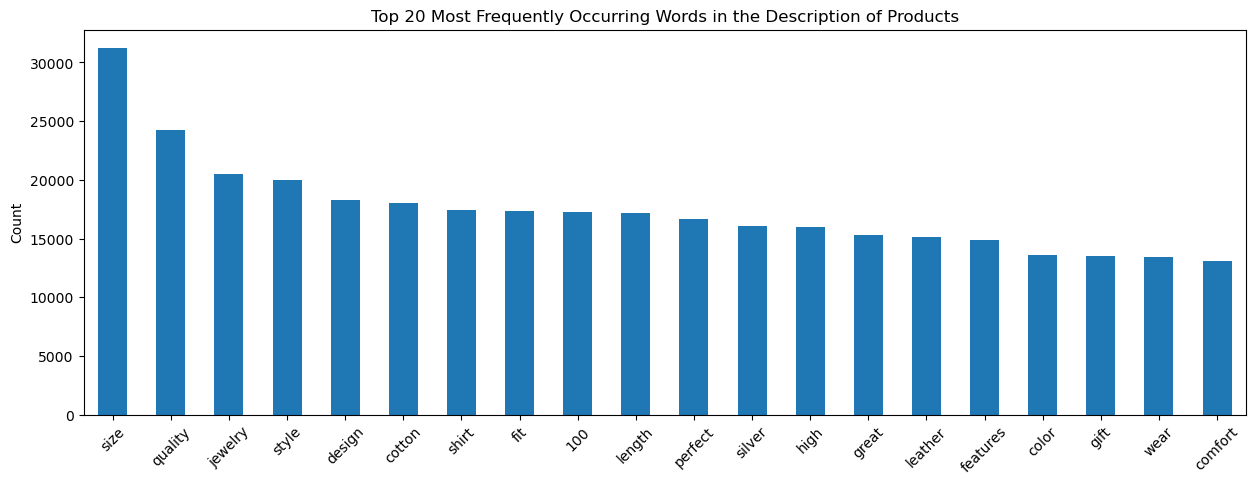

In [74]:
word_counts = pd.DataFrame(
    {"counts": transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Most Frequently Occurring Words in the Description of Products")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig('Figures/mostfrequentdesc.png')
plt.show()

## Conclusion <a class="anchor" id="conc"></a>

In this notebook, the data was cleaned such that it is ready to use when modelling and the data was saved to be read in other notebook.


*Next notebook*: `reviews_loading_preprocessing.ipynb`